<a href="https://colab.research.google.com/github/Sohail1173/Facial_recognition/blob/main/facial_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import cv2 as cv
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


In [1]:
!wget https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true -O data.zip
!unzip data.zip

--2023-01-18 10:46:19--  https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip [following]
--2023-01-18 10:46:19--  https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip [following]
--2023-01-18 10:46:19--  https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubus

In [6]:

x_train = np.load( "face_landmarks_cleaned/x_train.npy" ) / 255
y_train = np.load( "face_landmarks_cleaned/y_train.npy" ) / 96
x_test = np.load( "face_landmarks_cleaned/x_test.npy" ) / 255
y_test = np.load( "face_landmarks_cleaned/y_test.npy" ) / 96

y_train = np.reshape( y_train , ( -1 , 1 , 1 , 30 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))


In [7]:

model_layers = [ 
    tf.keras.layers.SeparableConv2D( 128 , input_shape=( 96 , 96 , 1 ) , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='sigmoid' ),
]
model = tf.keras.Sequential( model_layers )
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 92, 92, 128)      281       
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 92, 92, 128)      512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 92, 92, 128)       0         
                                                                 
 separable_conv2d_1 (Separab  (None, 88, 88, 128)      19712     
 leConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 88, 88, 128)      512       
 hNormalization)                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Trainable params: 258,181
Non-trainable params: 1,792
_________________________________________________________________


In [8]:

model.fit( x_train , y_train , epochs=25 , batch_size=50 , validation_data=( x_test , y_test ) )


Epoch 1/25
30/30 [==============================] - 51s 1s/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 2/25
30/30 [==============================] - 31s 1s/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 3/25
30/30 [==============================] - 30s 993ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 4/25
30/30 [==============================] - 33s 1s/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 5/25
30/30 [==============================] - 34s 1s/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 6/25
30/30 [==============================] - 33s 1s/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 7/25
30/30 [==============================] - 33s 1s/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 8/25
30/30 [==============================] - 31s 1s/step - loss: 0.0351 - mse: 0

1/1 [==============================] - 0s 16ms/step


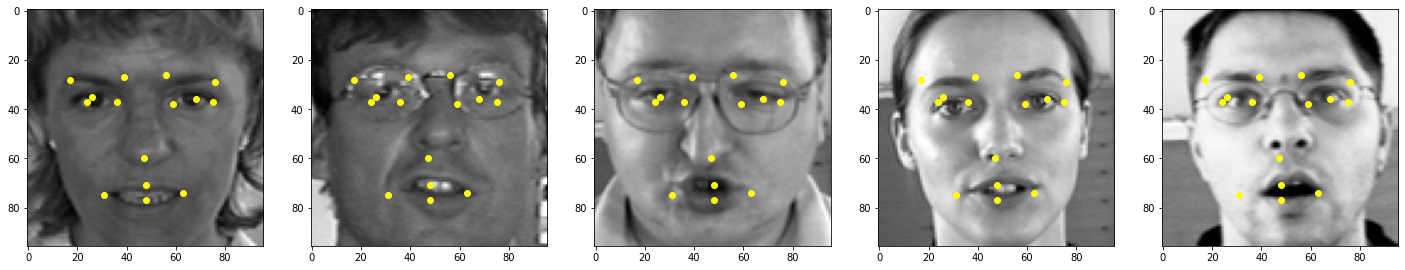

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 50 , 50 ))

for i in range( 1 , 6 ):
    sample_image = np.reshape( x_test[i] * 255  , ( 96 , 96 ) ).astype( np.uint8 )
    pred = model.predict( x_test[ i : i +1  ] ) * 96
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )
    fig.add_subplot( 1 , 10 , i )
    plt.imshow( sample_image.T , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
    
plt.show()

In [11]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

1/1 [==============================] - 0s 17ms/step


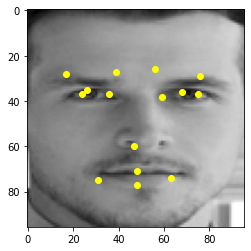

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open( "/content/face.jpg").convert('L').resize( ( 96 , 96 ) ).rotate( 90 )
image_arr = np.asarray( image ) / 255

pred = model.predict( np.array( [ image_arr.reshape( 96 , 96 , 1 ) ] ) ) * 96
pred = pred.astype( np.int32 )
pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )

plt.imshow( image_arr.T , cmap='gray' )
plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
plt.show()